## Gamma
This file is used to do the data processing for the gamma data.

In [2]:
# some imports

import pandas as pd   
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

In [3]:
# do some peeeking

data = pd.read_pickle("./Gamma Data/gammas_detected_0.pkl")

table = data.iloc[0] #.unstack().T

In [4]:
data

Energy         0.005                                                          \
Pebble           0             1             2             3             4     
Step                                                                           
100     5.436933e+05  1.131888e+06  1.173426e+06  6.839277e+05  1.282582e+06   
101     1.166454e+06  1.316818e+06  1.061908e+06  9.044997e+05  8.865959e+05   
102     1.150367e+06  1.131116e+06  9.309303e+05  1.076393e+06  6.983122e+05   
103     6.817527e+05  1.287792e+06  1.100101e+06  9.208512e+05  1.335070e+06   
104     5.819919e+05  5.762916e+05  6.389344e+05  7.269712e+05  6.212615e+05   
...              ...           ...           ...           ...           ...   
348     1.009193e+06  1.047070e+06  1.080573e+06  1.057154e+06  8.775413e+05   
349     1.068010e+06  1.022170e+06  1.075484e+06  7.226450e+05  8.812134e+05   
350     1.033721e+06  1.188186e+06  8.677620e+05  5.066064e+05  1.156832e+06   
351     9.124886e+05  1.404653e+06  1.011479e+06  6.512713e+05  9.158682e+05   
352     8.374963e+05  1.168033e+06  1.073696e+06  7.998372e+05  1.077338e+06   

Energy                                                                        \
Pebble           5             6             7             8             9     
Step                                                                           
100     1.168369e+06  8.713963e+05  8.792940e+05  1.445362e+06  9.712891e+05   
101     9.615514e+05  9.137217e+05  8.094096e+05  1.142699e+06  1.047542e+06   
102     6.016703e+05  1.156089e+06  9.114280e+05  1.193622e+06  1.108214e+06   
103     9.675234e+05  1.082863e+06  1.404742e+06  1.076713e+06  1.015171e+06   
104     9.323580e+05  6.802071e+05  1.464472e+06  9.958942e+05  9.184703e+05   
...              ...           ...           ...           ...           ...   
348     1.072042e+06  9.079811e+05  1.259117e+06  1.050134e+06  6.096745e+05   
349     9.950665e+05  9.845337e+05  1.184828e+06  1.133629e+06  8.276472e+05   
350     9.422792e+05  1.017717e+06  1.079723e+06  1.089568e+06  1.043201e+06   
351     8.329433e+05  1.300204e+06  1.137727e+06  1.008508e+06  9.194730e+05   
352     6.452750e+05  1.005503e+06  8.796834e+05  5.845069e+05  8.815715e+05   

Energy  ...     6.995                                                    \
Pebble  ...       863       864       865       866       867       868   
Step    ...                                                               
100     ...  0.000004  0.000008  0.000011  0.000006  0.000010  0.000009   
101     ...  0.000005  0.000006  0.000009  0.000007  0.000013  0.000007   
102     ...  0.000007  0.000004  0.000009  0.000008  0.000006  0.000006   
103     ...  0.000006  0.000011  0.000005  0.000009  0.000009  0.000005   
104     ...  0.000004  0.000005  0.000008  0.000009  0.000008  0.000007   
...     ...       ...       ...       ...       ...       ...       ...   
348     ...  0.000007  0.000007       NaN       NaN       NaN       NaN   
349     ...  0.000008  0.000009  0.000004  0.000007  0.000005  0.000005   
350     ...  0.000011  0.000007  0.000006  0.000008  0.000007  0.000010   
351     ...  0.000006  0.000007  0.000009  0.000008  0.000007  0.000006   
352     ...       NaN       NaN       NaN       NaN       NaN       NaN   

Energy                                          
Pebble       869       870       871       872  
Step                                            
100     0.000008  0.000010  0.000008  0.000007  
101     0.000006  0.000005  0.000008  0.000007  
102     0.000009  0.000004  0.000005  0.000006  
103     0.000011  0.000007  0.000008  0.000006  
104     0.000008  0.000009  0.000007  0.000008  
...          ...       ...       ...       ...  
348          NaN       NaN       NaN       NaN  
349     0.000006  0.000004  0.000008  0.000004  
350     0.000005  0.000008  0.000007  0.000008  
351     0.000007  0.000006  0.000006  0.000008  
352          NaN       NaN       NaN       NaN  

[253 rows x 516816 c

In [5]:
len(table.unstack().mean().values)

873

In [6]:


def find_first_nan_index(arr):
    """
    查找数组中尾部的第一个NaN值的位置。

    参数：
    arr (numpy.ndarray): 输入的NumPy数组。

    返回：
    int: 第一个NaN值的索引位置。如果没有NaN值，返回-1。
    """
    nan_indices = np.isnan(arr)
    first_nan_index = np.where(nan_indices)[0][0] if np.any(nan_indices) else -1
    return first_nan_index

# 创建一个示例数组，尾部包含NaN值



In [7]:


processed_data = []          

min_index = float('inf')

for i in  range(data.shape[0]):
    table = data.iloc[i]
    one_timestamp = table.unstack().mean().values


    if find_first_nan_index(one_timestamp) < min_index and find_first_nan_index(one_timestamp) != -1:
        min_index = find_first_nan_index(one_timestamp)


    processed_data.append(one_timestamp)


print(len(processed_data))
print(processed_data[0].shape)



processed_data = np.array(processed_data)


print(processed_data.shape)

253
(873,)
(253, 873)


In [8]:
min_index

845

In [15]:
table = data.iloc[i].unstack().mean()
table

Pebble
0      421129.640066
1      583352.277450
2      533572.528060
3      398811.971929
4      535599.818604
           ...      
868              NaN
869              NaN
870              NaN
871              NaN
872              NaN
Length: 873, dtype: float64

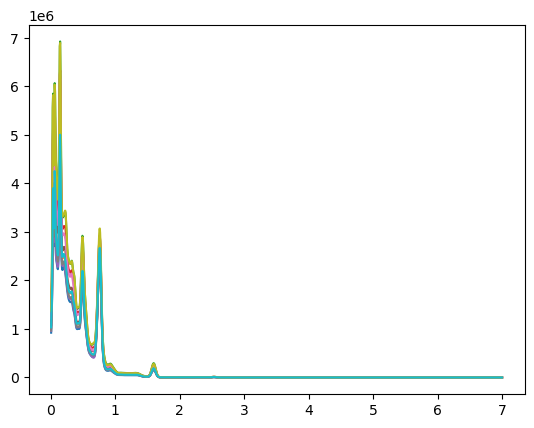

In [9]:
for i in  range(10):
    table = data.iloc[i].unstack()

    random_column = random.choice(table.columns)

    print(random_column)

    plt.plot(table[random_column])

In [10]:
processed_data = []          

min_index = float('inf')

for i in  range(data.shape[0]):
    table = data.iloc[i]
    one_timestamp = table.unstack().mean().values[:845]




    processed_data.append(one_timestamp)


print(len(processed_data))
print(processed_data[0].shape)



processed_data = np.array(processed_data)


print(processed_data.shape)

253
(845,)
(253, 845)


In [11]:
np.savetxt("./Gamma Data/Quantile_1_cycle_32_pebble_mean.csv", processed_data, delimiter = ",")

In [12]:
np.savetxt("./Gamma Data/Quantile_1_cycle_32_pebble_mean.csv", processed_data, delimiter = ",")